# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Load Dataset

In [ ]:
import pandas as pd
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1WWaOViUpgcAwcqlDAvn062CftIXxs6Kg')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


https://drive.google.com/file/d/1WWaOViUpgcAwcqlDAvn062CftIXxs6Kg/view?usp=drive_link

# Data Preparation

In [ ]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


# Cek Variasi Spesiesnya

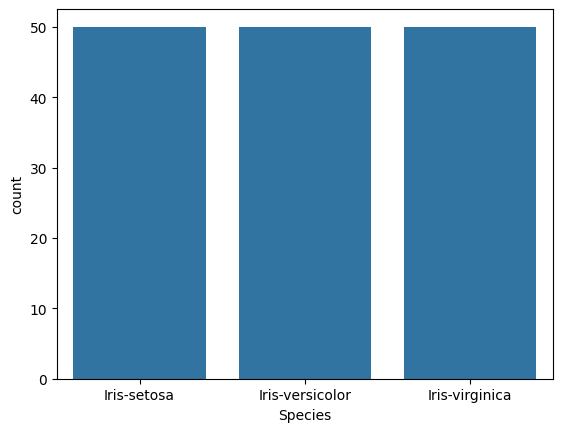

In [ ]:
sns.countplot(x="Species", data=df)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["SpeciesEndcoded"] = le.fit_transform(df["Species"])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SpeciesEndcoded
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [ ]:
#Fitur untuk clustering
x = df.drop(["Id", "Species", "SpeciesEndcoded"], axis=1)

In [ ]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


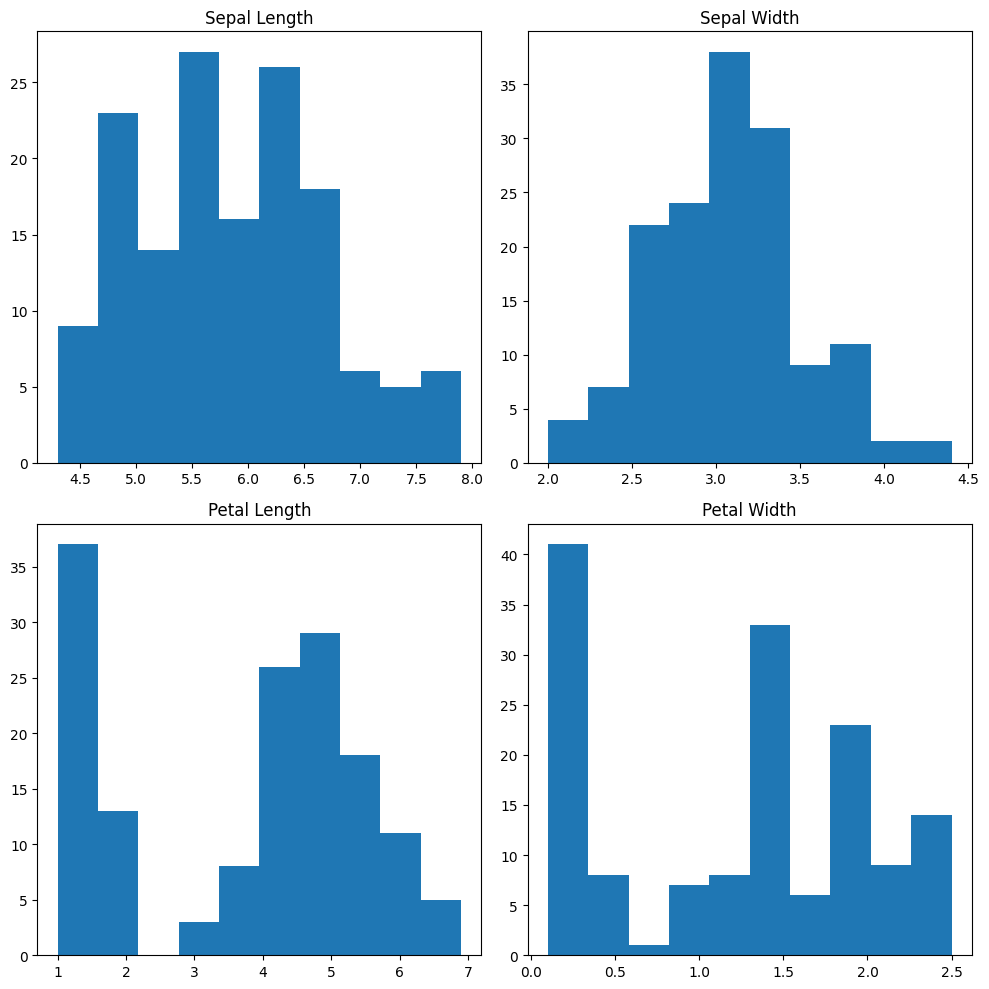

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Histogram 1: Sepal Length
axes[0,0].set_title("Sepal Length")
axes[0,0].hist(x["SepalLengthCm"])

# Histogram 2: Sepal Width
axes[0,1].set_title("Sepal Width")
axes[0,1].hist(x["SepalWidthCm"])

# Histogram 3: Petal Length
axes[1,0].set_title("Petal Length")
axes[1,0].hist(x["PetalLengthCm"])

# Histogram 4: Petal Width
axes[1,1].set_title("Petal Width")
axes[1,1].hist(x["PetalWidthCm"])

plt.tight_layout()
plt.show()

# Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Re-initialize X from the original DataFrame 'df'
# This ensures X is a DataFrame with named columns for indexing before scaling
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# Now apply the scaling
X = scaler.fit_transform(X)
X[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

# Mencari nilai K terbauk

Mencari K nya dengan Teknik Elbow

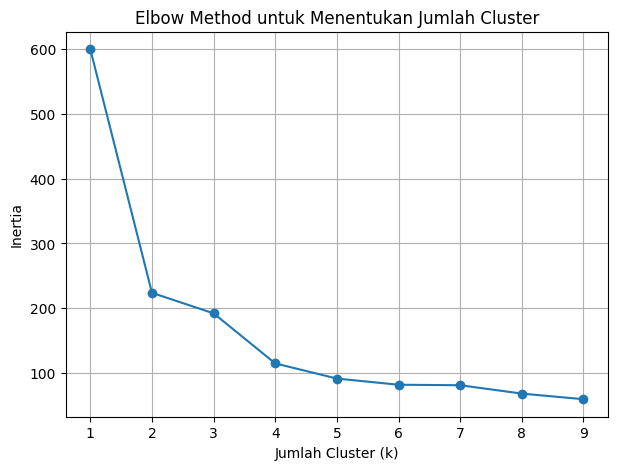

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_list = []
K_range = range(1, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init='auto') # n_init='auto' added for modern scikit-learn
    km.fit(X)
    inertia_list.append(km.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K_range, inertia_list, marker='o')
plt.title("Elbow Method untuk Menentukan Jumlah Cluster")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Mendeklarasikan Model

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=3,
    init="k-means++",   # Corrected 'K-means++' to 'k-means++'
    random_state=42
)

In [ ]:
# 1. Latih model (menentukan cetroid + proses clustering)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [ ]:
# 2. Prediksi cluster untuk data x
labels = kmeans.predict(X)

In [ ]:
# 3. Masukkan ke DataFrame
df["Cluster"] = labels

In [ ]:
# df["Cluster"] = kmeans.fit_predict(X)

print("Cluster ditemukan", df["Cluster"].unique())

Cluster ditemukan [1 2 0]


# Shilhouet Score

In [ ]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, df["Cluster"])
print("\n === SILHOETTE SCORE===")
print("Silhouette Score:", sil_score)


 === SILHOETTE SCORE===
Silhouette Score: 0.4787241921049546


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print("\n ===== CONFUSION MATRIX ===== ")
cm = confusion_matrix(df["SpeciesEndcoded"], df["Cluster"])
print(cm)


 ===== CONFUSION MATRIX ===== 
[[ 0 32 18]
 [46  0  4]
 [50  0  0]]


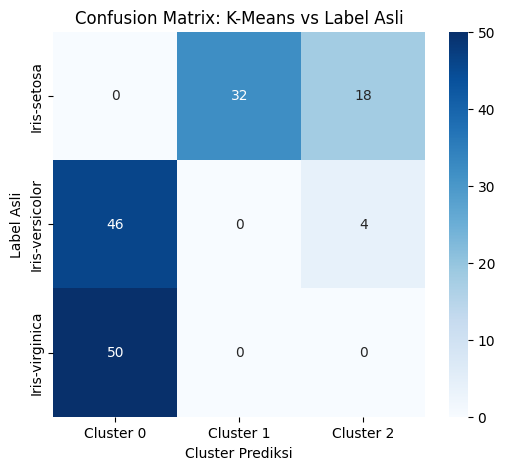

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=["Cluster 0", "Cluster 1", "Cluster 2"],
    yticklabels=le.classes_
)

plt.title("Confusion Matrix: K-Means vs Label Asli")
plt.xlabel("Cluster Prediksi")
plt.ylabel("Label Asli")
plt.show()

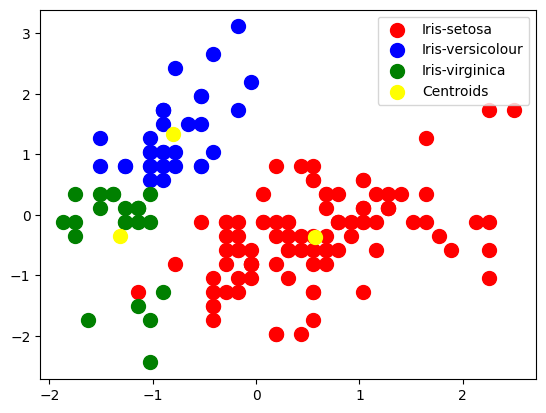

In [ ]:
# Visualizing the clusters
plt.scatter(X[df["Cluster"] == 0, 0], X[df["Cluster"] == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[df["Cluster"] == 1, 0], X[df["Cluster"] == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[df["Cluster"] == 2, 0], X[df["Cluster"] == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show() # <-- Baris ini diasumsikan ada untuk menampilkan plot, meskipun terpotong di gambar

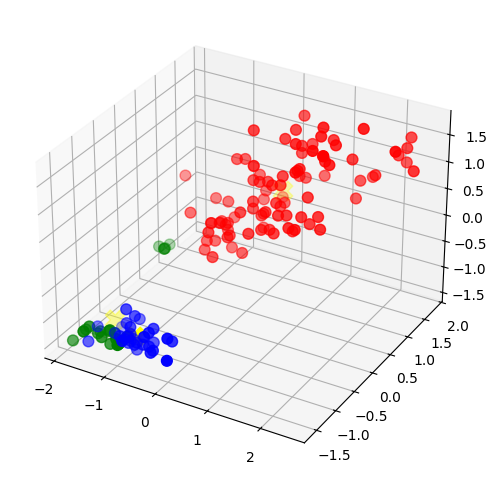

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Mapping cluster -> nama spesies
cluster_map = {0: "Iris-setosa", 1: "Iris-versicolor", 2: "Iris-virginica"}
colors = ['red', 'blue', 'green']

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster
for cluster_id, color in zip(cluster_map.keys(), colors):
    idx = df["Cluster"] == cluster_id
    ax.scatter(
        X[idx, 0], X[idx, 2], X[idx, 3], # Menggunakan tiga fitur: X[:, 0], X[:, 2], X[:, 3]
        s=60, c=color, label=cluster_map[cluster_id]
    )

# Plot centroids
ax.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 2],
    kmeans.cluster_centers_[:, 3],
    s=200, c='yellow', marker='X', label='Centroids'
)